In [1]:
# Description: Use RSI to determine the stock action

In [2]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [3]:
# store stock data
df = pd.read_csv('Data/TSLA.csv')

# set index by date
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000


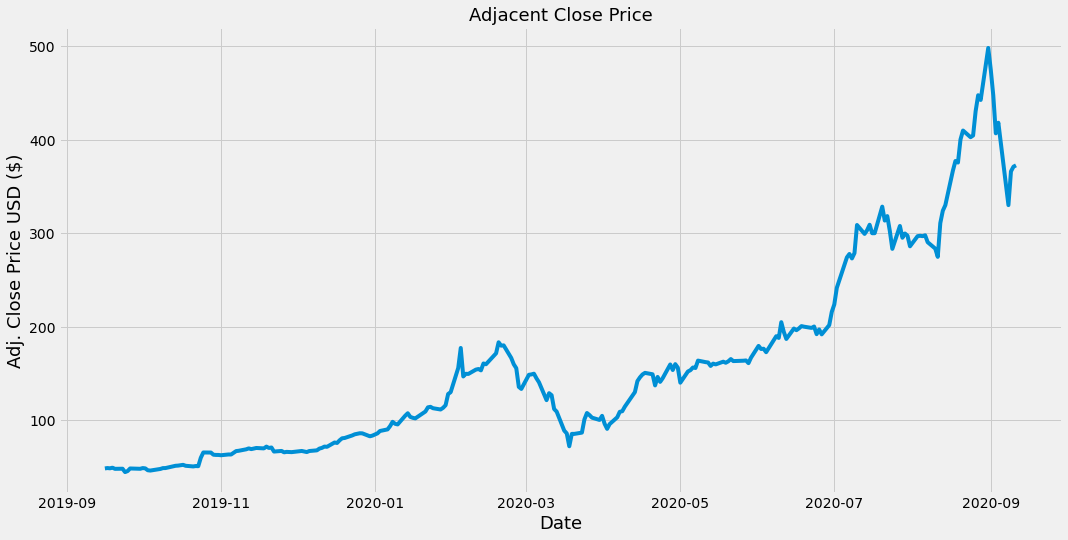

In [4]:
# visually show the close price
plt.figure(figsize=(16,8))
plt.title('Adjacent Close Price', fontsize=18)
plt.plot(df.index, df['Adj Close'], label = 'Adj Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# prepare the data to calculate RSI

# Get the difference in price from previous day
delta = df['Adj Close'].diff(1)

delta

2019-09-16          NaN
2019-09-17     0.396000
2019-09-18    -0.259998
2019-09-19     0.621998
2019-09-20    -1.195999
                ...    
2020-09-04    11.320007
2020-09-08   -88.110016
2020-09-09    36.070008
2020-09-10     5.059997
2020-09-11     1.380005
Name: Adj Close, Length: 251, dtype: float64

In [6]:
# Get rid of the NaN values from the data set
delta = delta.dropna()
delta

2019-09-17     0.396000
2019-09-18    -0.259998
2019-09-19     0.621998
2019-09-20    -1.195999
2019-09-23     0.121997
                ...    
2020-09-04    11.320007
2020-09-08   -88.110016
2020-09-09    36.070008
2020-09-10     5.059997
2020-09-11     1.380005
Name: Adj Close, Length: 250, dtype: float64

In [7]:
# get the positive gains (up), and the negative losses (down)
up = delta.copy()
down = delta.copy()

# keep only positive values for up(set any negative values to 0)
up[up<0] = 0

# keep only negative values for down(any positive values set to 0)
down[down>0] = 0

In [8]:
# Get the time period
period = 14
# calculate the average gain and the average loss
avg_Gain = up.rolling(window=period).mean()
avg_Loss = abs(down.rolling(window=period).mean())

In [9]:
# calculate the RSI

# calculate the Relative Strength(RS)
RS = avg_Gain / avg_Loss

# Calc the RSI
RSI = 100.0 - (100.0 / (1.0 + RS))

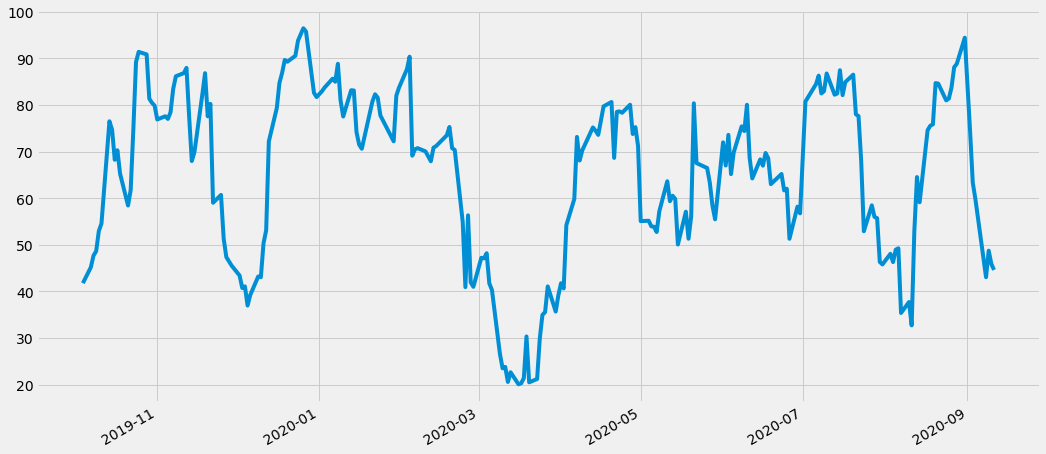

In [11]:
# show the RSI visually
plt.figure(figsize=(16,8))
RSI.plot()
plt.show()

In [12]:
# put it all together

# create a new dataframe
new_df = pd.DataFrame()
new_df['Adj Close Price'] = df['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close Price,RSI
2019-09-16,48.562000,NaN
2019-09-17,48.958000,NaN
2019-09-18,48.698002,NaN
2019-09-19,49.320000,NaN
2019-09-20,48.124001,NaN
...,...,...
2020-09-04,418.320007,59.780366
2020-09-08,330.209991,43.047996
2020-09-09,366.279999,48.739456
2020-09-10,371.339996,45.903593


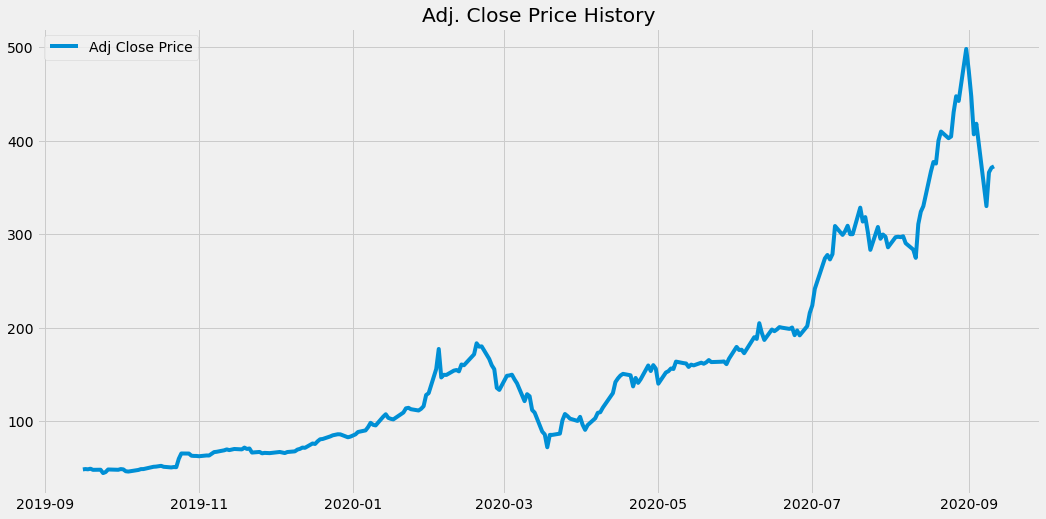

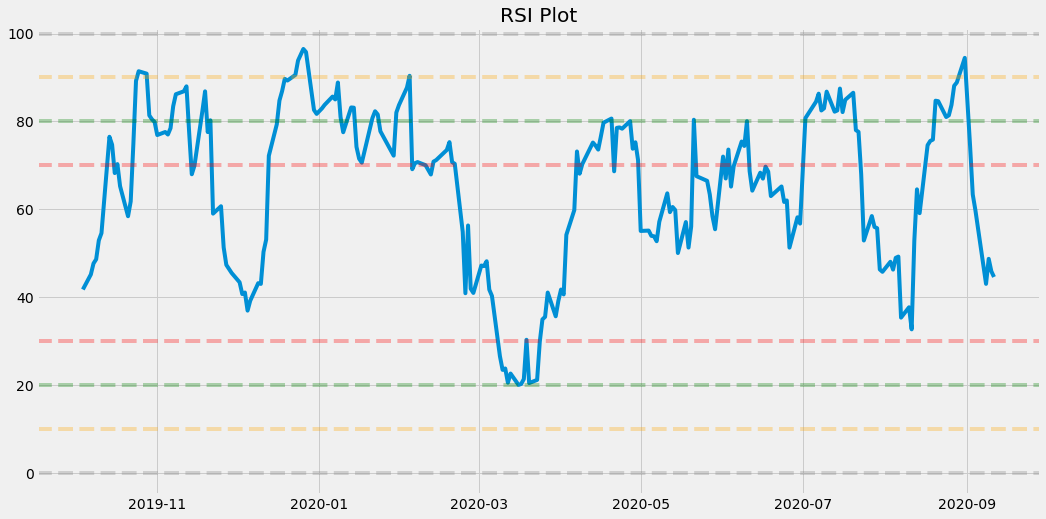

In [14]:
# show graphs

# plot the Adj close price
plt.figure(figsize=(16,8))
plt.plot(new_df.index, new_df['Adj Close Price'])
plt.title('Adj. Close Price History')
plt.legend(new_df.columns.values, loc='upper left')
plt.show()

# Plot the RSI values and the significant levels
plt.figure(figsize=(16, 8))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha=0.3, color='gray')
plt.axhline(10, linestyle='--', alpha=0.3, color='orange')
plt.axhline(20, linestyle='--', alpha=0.3, color='green')
plt.axhline(30, linestyle='--', alpha=0.3, color='red')
plt.axhline(70, linestyle='--', alpha=0.3, color='red')
plt.axhline(80, linestyle='--', alpha=0.3, color='green')
plt.axhline(90, linestyle='--', alpha=0.3, color='orange')
plt.axhline(100, linestyle='--', alpha=0.3, color='gray')
plt.show()